In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('binary.arff.csv')

In [3]:
# Step 2: Preprocess the data
# Assuming the last column is the label and all other columns are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Step 3: Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# Step 4: Train a RandomForestClassifier with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Step 5: Predict the labels on the testing set
y_pred = grid_search.best_estimator_.predict(X_test)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [9]:

# Step 6: Calculate the accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


In [12]:
# Additional evaluation metrics
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Best hyperparameters
print("\n=== Best Hyperparameters ===")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")



=== Classification Report ===
              precision    recall  f1-score   support

         ALL       1.00      1.00      1.00        12
         AML       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


=== Confusion Matrix ===
[[12  0]
 [ 0  3]]

=== Best Hyperparameters ===
bootstrap: True
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 200


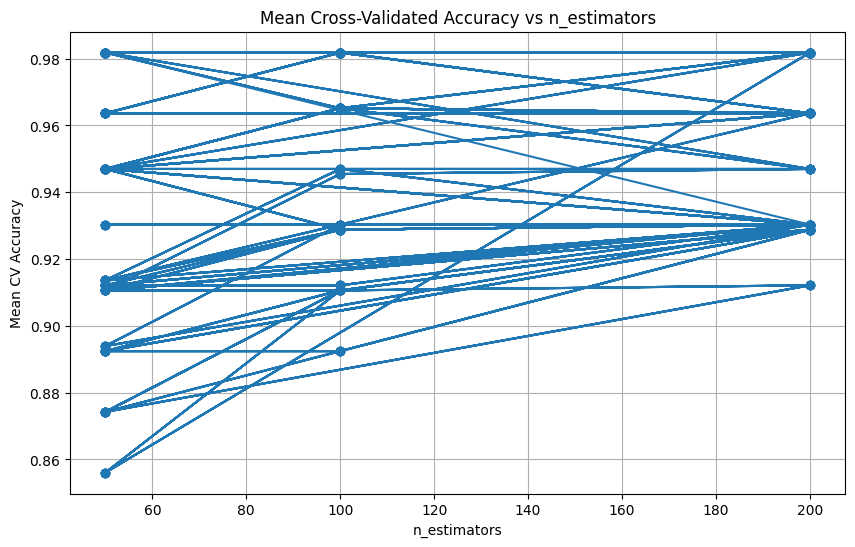

In [11]:
import matplotlib.pyplot as plt

def plot_rf_hyperparameters(grid_search):
    """
    Plot the mean cross-validated accuracy for each value of the hyperparameter 'n_estimators'.
    """
    # Extract the hyperparameter values and their corresponding mean test scores
    n_estimators_values = grid_search.cv_results_['param_n_estimators'].data
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_values, mean_test_scores, marker='o')
    plt.title('Mean Cross-Validated Accuracy vs n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

# Example usage for Random Forest
plot_rf_hyperparameters(grid_search)  # Replace 'grid_search' with your GridSearchCV object
